In [1]:
import pandas as pd

In [2]:
imdb_df = pd.read_csv('./data/imdb-reviews_2.csv')
imdb_df

,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1
...,...,...
4995,Whenever people ask name scariest movie I've e...,1
4996,review applies cut film that's generally avail...,0
4997,"There's little get excited ""Dan Real Life"". Fi...",0
4998,"Twisted, bizarre, enchanting, hilarious! could...",1


In [3]:
imdb_df.groupby('label').count()

,review
label,
0,2472
1,2528


In [4]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def clean_review(review):
    lemmatizer = WordNetLemmatizer()
    custom_stopwords = stopwords.words('english') + ['movie', 'film', 'one', 'make', 'even']
    cleaned_review = []
    
    for word in review.split():
        if len(word) > 2 and word not in custom_stopwords:
            cleaned_word = word.translate(str.maketrans('', '', punctuation)).lower()
            lemmetized_word = lemmatizer.lemmatize(cleaned_word)
            cleaned_review.append(lemmetized_word)
    return ' '.join(cleaned_review)

imdb_df['review_processed'] = imdb_df['review'].apply(clean_review)

imdb_df

,review,label,review_processed
0,"first think another Disney movie, might good, ...",1,first think another disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put aside dr house repeat missed desperate hou...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work made greater fan kin...
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv needle say movie watch...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film acting terrific plot jeff c...
...,...,...,...
4995,Whenever people ask name scariest movie I've e...,1,whenever people ask name scariest ive ever see...
4996,review applies cut film that's generally avail...,0,review applies cut thats generally available f...
4997,"There's little get excited ""Dan Real Life"". Fi...",0,there little get excited dan real life first o...
4998,"Twisted, bizarre, enchanting, hilarious! could...",1,twisted bizarre enchanting hilarious stop laug...


I didn't understand the directions about converting NLTK tags to wordnet and using POS to lemmetize sentences, and I didn't find any notebooks in the course materials that had any examples, so I googled a possible solution and found this:

https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python

In [5]:
import nltk
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import numpy as np

In [8]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
def lemmatize_with_tags(review):
    tokens = word_tokenize(review)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token, tag in pos_tag(tokens):
        wordnet_tag = get_wordnet_pos(tag)
        if wordnet_tag is None:
            lemmatized_tokens.append(token)
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(token, wordnet_tag))
    return lemmatized_tokens

imdb_df['wordnet_tagged'] = imdb_df['review_processed'].apply(lemmatize_with_tags)
imdb_df

,review,label,review_processed,wordnet_tagged
0,"first think another Disney movie, might good, ...",1,first think another disney movie might good ki...,"[first, think, another, disney, movie, might, ..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,put aside dr house repeat missed desperate hou...,"[put, aside, dr, house, repeat, miss, desperat..."
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work made greater fan kin...,"[big, fan, stephen, king, work, make, great, f..."
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv needle say movie watch...,"[watch, horrid, thing, tv, needle, say, movie,..."
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film acting terrific plot jeff c...,"[truly, enjoyed, film, act, terrific, plot, je..."
...,...,...,...,...
4995,Whenever people ask name scariest movie I've e...,1,whenever people ask name scariest ive ever see...,"[whenever, people, ask, name, scariest, ive, e..."
4996,review applies cut film that's generally avail...,0,review applies cut thats generally available f...,"[review, applies, cut, thats, generally, avail..."
4997,"There's little get excited ""Dan Real Life"". Fi...",0,there little get excited dan real life first o...,"[there, little, get, excite, dan, real, life, ..."
4998,"Twisted, bizarre, enchanting, hilarious! could...",1,twisted bizarre enchanting hilarious stop laug...,"[twisted, bizarre, enchant, hilarious, stop, l..."


In [26]:
pos_reviews = imdb_df[imdb_df['label'] == 1]
pos_reviews_words = []
for reviews_list in pos_reviews['wordnet_tagged'].values:
    pos_reviews_words = pos_reviews_words + reviews_list


In [32]:
from collections import Counter
fdist = Counter(pos_reviews_words)

<AxesSubplot:xlabel='count', ylabel='word'>

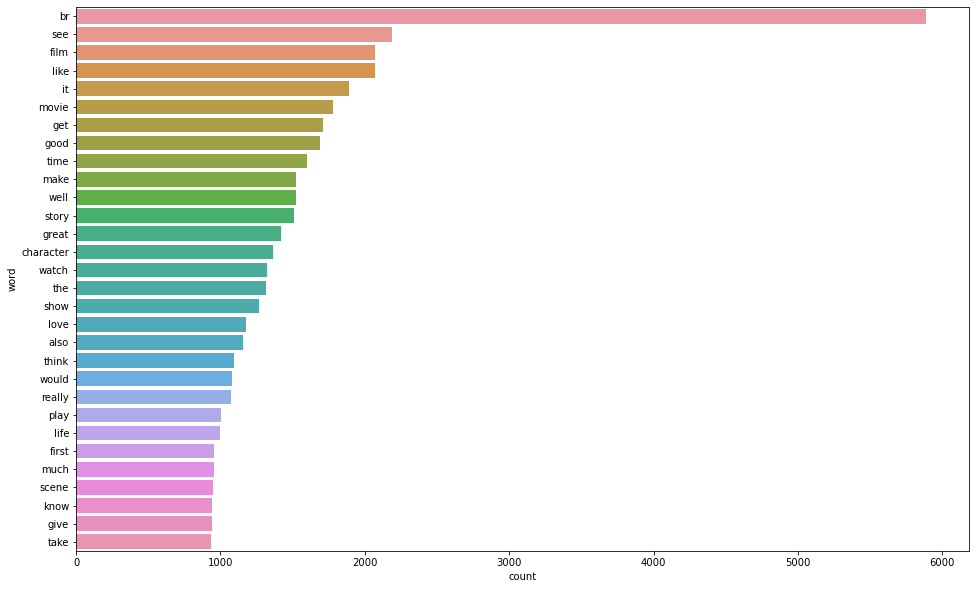

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
most_common_words_df = pd.DataFrame(fdist.most_common(30), columns =['word', 'count'])
plt.figure(figsize=(16, 10))
sns.barplot(x="count", y="word", data=most_common_words_df)

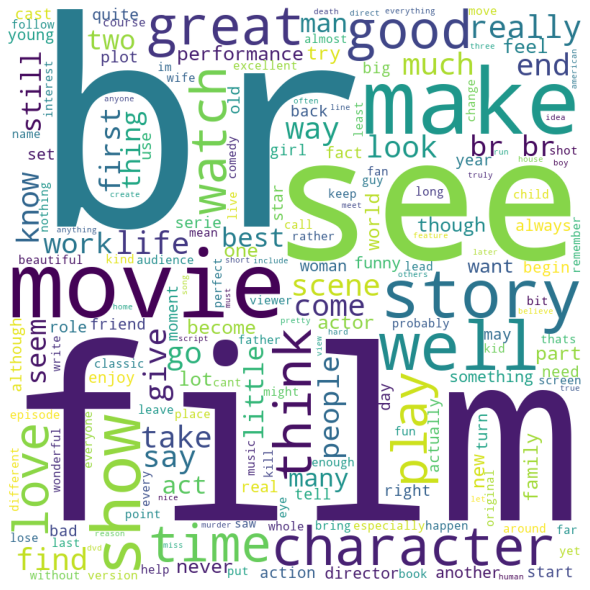

In [34]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(pos_reviews_words))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [35]:
imdb_df['wordnet_tagged_string'] = imdb_df['wordnet_tagged'].str.join(' ')
imdb_df

,review,label,review_processed,wordnet_tagged,wordnet_tagged_string
0,"first think another Disney movie, might good, ...",1,first think another disney movie might good ki...,"[first, think, another, disney, movie, might, ...",first think another disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put aside dr house repeat missed desperate hou...,"[put, aside, dr, house, repeat, miss, desperat...",put aside dr house repeat miss desperate house...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work made greater fan kin...,"[big, fan, stephen, king, work, make, great, f...",big fan stephen king work make great fan king ...
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv needle say movie watch...,"[watch, horrid, thing, tv, needle, say, movie,...",watch horrid thing tv needle say movie watch s...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film acting terrific plot jeff c...,"[truly, enjoyed, film, act, terrific, plot, je...",truly enjoyed film act terrific plot jeff comb...
...,...,...,...,...,...
4995,Whenever people ask name scariest movie I've e...,1,whenever people ask name scariest ive ever see...,"[whenever, people, ask, name, scariest, ive, e...",whenever people ask name scariest ive ever see...
4996,review applies cut film that's generally avail...,0,review applies cut thats generally available f...,"[review, applies, cut, thats, generally, avail...",review applies cut thats generally available f...
4997,"There's little get excited ""Dan Real Life"". Fi...",0,there little get excited dan real life first o...,"[there, little, get, excite, dan, real, life, ...",there little get excite dan real life first of...
4998,"Twisted, bizarre, enchanting, hilarious! could...",1,twisted bizarre enchanting hilarious stop laug...,"[twisted, bizarre, enchant, hilarious, stop, l...",twisted bizarre enchant hilarious stop laugh w...


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2500)
X = vectorizer.fit_transform(imdb_df['wordnet_tagged_string'].values)

X = X.toarray() 

X_train, X_test, y_train, y_test  = train_test_split(
        X, 
        imdb_df['label'],
        train_size=0.80, 
        random_state=42
)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
score = accuracy_score(y_test, y_hat)
print(f'accuracy: {score}')

accuracy: 0.698


plot_confusion_matrix and seaborn heat map produce the same plot so I'm just going with plot_confusion_matrix

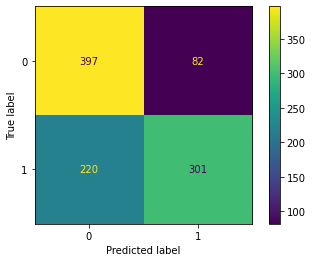

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       479
           1       0.79      0.58      0.67       521

    accuracy                           0.70      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.72      0.70      0.69      1000



In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, X_test, y_test)
plt.show()

print(classification_report(y_test, y_hat))

For C = 0.01, accuracy is 0.848


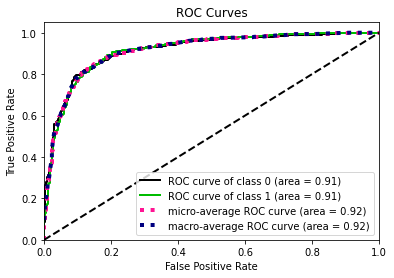

For C = 0.05, accuracy is 0.855


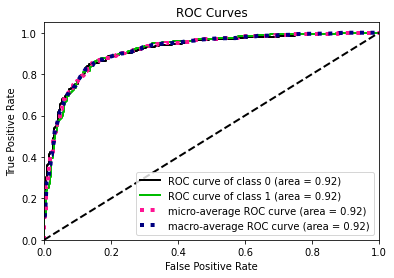

For C = 0.5, accuracy is 0.829


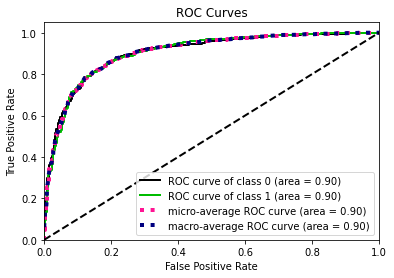

For C = 1.0, accuracy is 0.823


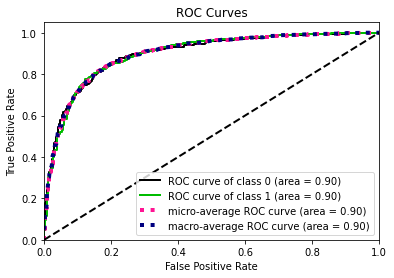

In [61]:
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc

C_parameters = [0.01, 0.05, 0.5, 1.0]

for C in C_parameters:
    clf = LogisticRegression(C=C, solver='liblinear', random_state=42)
    clf.fit(X_train, y_train)
    print(f'For C = {C}, accuracy is {clf.score(X_test, y_test)}')
    probs = clf.predict_proba(X_test)
    plot_roc(y_test, probs)
    plt.show()